# Apply Data Storytelling to Captone Project

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
import scipy.stats as stats
from scipy import stats
import statsmodels.formula.api as smf
import itertools

In [3]:
# import data and inspect
df = pd.read_csv("clean_spotify.csv")
df.head()

,Id,track__artists__name,track__name,track__album__name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,"7KXjTSCq5nL1LoYtL7XAwS,",Kendrick Lamar,HUMBLE.,DAMN.,0.904,0.611,1,-6.842,0,0.0888,0.000259,0.00002,0.0976,0.400,150.020,177000,4
1,"7GX5flRQZVHRAGd6B4TmDO,",Lil Uzi Vert,XO TOUR Llif3,Luv Is Rage 2,0.732,0.750,11,-6.366,0,0.2310,0.002640,0.00000,0.1090,0.401,155.096,182707,4
2,"7qiZfU4dY1lWllzX7mPBI3,",Ed Sheeran,Shape of You,÷ (Deluxe),0.825,0.652,1,-3.183,0,0.0802,0.581000,0.00000,0.0931,0.931,95.977,233713,4
3,"3a1lNhkSLSkpJE4MSHpDu9,",Post Malone,Congratulations (feat. Quavo),Stoney,0.627,0.812,6,-4.215,1,0.0358,0.198000,0.00000,0.2120,0.504,123.071,220293,4
4,"5CtI0qwDJkDQGwXD1H1cLb,",Luis Fonsi,"Despacito - Remix (feat. Daddy Yankee, Justin ...",Despacito Feat. Justin Bieber (Remix),0.694,0.815,2,-4.328,1,0.1200,0.229000,0.00000,0.0924,0.813,88.931,228827,4


In [4]:
df.columns

Index([u'Id', u'track__artists__name', u'track__name', u'track__album__name',
       u'danceability', u'energy', u'key', u'loudness', u'mode',
       u'speechiness', u'acousticness', u'instrumentalness', u'liveness',
       u'valence', u'tempo', u'duration_ms', u'time_signature'],
      dtype='object')

In [ ]:
### getting the odds ratios, Z-Value, and 95% CI
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['z-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())
model_odds

For every one unit increase in liveness, the odds of being in the top 10 songs of the year list increases by a factor of 1.023; for every one unit increase in loudness, the odds of being in the top 10 songs of the year list  increases by a factor of 1.037.

In [23]:
#correlation test using pearsonr() method
stats.pearsonr(data['energy'], data['loudness'])

(0.75349307114248487, 1.499059522689576e-19)

### Pearson Results
##### - R-Value = 0.753 , P-Value = 1.500

In [25]:
#correlation test using Spearman Rank Method
stats.spearmanr(data['energy'], data['loudness'])

SpearmanrResult(correlation=0.77761508892083031, pvalue=1.8275464547752135e-21)

### Spearman Results
#### - R-Value = 0.778, P-Value = 1.828

In [26]:
#correlation test using Kendall Tau Method
stats.kendalltau(data['energy'], data['loudness'])

KendalltauResult(correlation=0.57160223405989119, pvalue=3.8746652696202532e-17)

### Kendall Results
##### R-Value = 0.572, P-Value = 1.875

In [13]:
def pwise_corr_pvalues(df, to_csv= False, file_name = None, method= None):
    df = df.dropna(how= 'any')._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    rvalues = dfcols.transpose().join(dfcols, how='outer')
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    length = str(len(df))
        
    if method == None:
        test = stats.pearsonr
        test_name = "Pearson"
    elif method == "spearman":
        test = stats.spearmanr
        test_name = "Spearman Rank"
    elif method == "kendall":
        test = stats.kendalltau
        test_name = "Kendall's Tau-b"
        

    for r in df.columns:
        for c in df.columns:
            rvalues[r][c] = round(test(df[r], df[c])[0], 4)
       
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = format(test(df[r], df[c])[1], '.4f')
            
    if to_csv == False:
        
        print("Correlation test conducted using list-wise deletion", 
              "\n",
              "Total observations used: ",length, "\n", "\n", 
              "{test_name} Correlation Values", "\n", rvalues, "\n",
              "Significant Levels", "\n", pvalues)
    
    if to_csv == True:
        
        print("Correlation test conducted using list-wise deletion", 
              "\n",
              "Total observations used: ",length, "\n", "\n", 
              "{test_name} Correlation Values", "\n", rvalues, "\n",
              "Significant Levels", "\n", pvalues)
        
        file = open(file_name, 'a')
        file.write("Correlation test conducted using list-wise deletion" + "\n" + "{test_name} correlation values" + "\n")       
        file.write("Total observations used: " + length + "\n")
        file.close()
        rvalues.to_csv(file_name, header= True, mode= 'a')
        file = open(file_name, 'a')
        file.write("p-values" + "\n")
        file.close()
        pvalues.to_csv(file_name, header= True, mode= 'a')

In [12]:
pwise_corr_pvalues(df[['danceability', 'energy', 'key', 'loudness', 'mode', 
                       'speechiness', 'acousticness', 'instrumentalness', 
                       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']])

('Correlation test conducted using list-wise deletion', '\n', 'Total observations used: ', '100', '\n', '\n', '{test_name} Correlation Values', '\n',                  danceability  energy     key loudness    mode speechiness  \
danceability                1 -0.1236 -0.0837  -0.0458 -0.0876      0.2322   
energy                -0.1236       1 -0.0934   0.7535 -0.1206     -0.3003   
key                   -0.0837 -0.0934       1  -0.1401 -0.2656      0.0648   
loudness              -0.0458  0.7535 -0.1401        1 -0.0811     -0.4109   
mode                  -0.0876 -0.1206 -0.2656  -0.0811       1     -0.1125   
speechiness            0.2322 -0.3003  0.0648  -0.4109 -0.1125           1   
acousticness          -0.0371  -0.066 -0.0483  -0.0234    0.02     -0.0198   
instrumentalness      -0.0665  0.0923 -0.0756  -0.0343  0.1255     -0.0808   
liveness               -0.017  0.0839 -0.0049  -0.0262 -0.0625      0.0446   
valence                0.2574  0.4578  -0.028   0.4442 -0.1518     -0.

In [49]:
def pwise_corr_pvalues(df, to_csv= False, file_name = None, method= None):   
    correlations = {}
    pvalues = {}
    length = {}
    columns = df.columns.tolist()
    
    if method == None:
        test = stats.pearsonr
        test_name = "Pearson"
    elif method == "spearman":
        test = stats.spearmanr
        test_name = "Spearman Rank"
    elif method == "kendall":
        test = stats.kendalltau
        test_name = "Kendall's Tau-b"
    
    
    for col1, col2 in itertools.combinations(columns, 2):
        sub = df[[col1,col2]].dropna(how= "any")
        correlations[col1 + " " + "&" + " " + col2] = format(test(sub.loc[:, col1], sub.loc[:, col2])[0], '.4f')
        pvalues[col1 + " " + "&" + " " + col2] = format(test(sub.loc[:, col1], sub.loc[:, col2])[1], '.4f')
        length[col1 + " " + "&" + " " + col2] = len(df[[col1,col2]].dropna(how= "any"))
        
    corrs = pd.DataFrame.from_dict(correlations, orient= "index")
    corrs.columns = ["r value"]                
    
    pvals = pd.DataFrame.from_dict(pvalues, orient= "index")
    pvals.columns = ["p-value"]
        
    l = pd.DataFrame.from_dict(length, orient= "index")
    l.columns = ["N"]
    
    results = corrs.join([pvals,l])
    
    if to_csv == False:
        print("{test_name} correlation", "\n", results)
    
    if to_csv == True:
        print(results)
        results.to_csv(file_name, header= True, mode = 'w', float_format='%.4f')

In [50]:
pwise_corr_pvalues(df[['danceability', 'energy', 'key', 'loudness', 'mode', 
                       'speechiness', 'acousticness', 'instrumentalness', 
                       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']])

('{test_name} correlation', '\n',                                    r value p-value    N
danceability & key                 -0.0837  0.4075  100
valence & tempo                    -0.1038  0.3041  100
key & acousticness                 -0.0483  0.6329  100
speechiness & acousticness         -0.0198  0.8447  100
speechiness & instrumentalness     -0.0808  0.4244  100
key & speechiness                   0.0648  0.5216  100
speechiness & duration_ms          -0.0877  0.3857  100
acousticness & liveness            -0.1604  0.1108  100
mode & instrumentalness             0.1255  0.2134  100
loudness & acousticness            -0.0234  0.8171  100
loudness & instrumentalness        -0.0343  0.7348  100
acousticness & valence              0.1451  0.1496  100
key & time_signature               -0.0742  0.4631  100
mode & acousticness                 0.0200  0.8437  100
energy & key                       -0.0934  0.3553  100
danceability & duration_ms         -0.0433  0.6685  100
danceability &

In [ ]:
'danceability', u'energy', u'key', u'loudness', u'mode',
       u'speechiness', u'acousticness', u'instrumentalness', u'liveness',
       u'valence', u'tempo', u'duration_ms', u'time_signature'

In [54]:
## Define 2 random distributions
#Sample Size
N = 10
#Gaussian distributed data with mean = 2 and var = 1
a = np.random.randn(N) + 2
#Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)


## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

#std deviation
s = np.sqrt((var_a + var_b)/2)
s



## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))



## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)


print("t = " + str(t))
print("p = " + str(2*p))
#Note that we multiply the p value by 2 because its a twp tail t-test

## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(2*p2))

t = inf
p = 0.0
t = 4.12244171961
p = 0.00127897290736


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars


In [3]:
# inspecting data
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.733550,0.596420,5.040000,-6.378080,0.590000,0.141210,0.165205,0.003430,0.149470,0.473075,121.610040,221063.550000,3.970000
std,0.126476,0.143969,3.874079,2.013111,0.494311,0.124485,0.157759,0.022650,0.077585,0.227143,27.521668,38814.915505,0.171447
min,0.314000,0.245000,0.000000,-11.462000,0.000000,0.023200,0.000259,0.000000,0.056500,0.086200,75.016000,119133.000000,3.000000
25%,0.668750,0.494250,1.000000,-7.689500,0.000000,0.052500,0.039850,0.000000,0.096800,0.305500,99.984500,200730.000000,4.000000
50%,0.742500,0.594000,5.000000,-6.331500,1.000000,0.086600,0.112500,0.000000,0.123000,0.435500,123.525500,219686.500000,4.000000
75%,0.827000,0.691500,8.000000,-4.801500,1.000000,0.219000,0.237500,0.000013,0.174500,0.661250,139.984250,240071.500000,4.000000
max,0.941000,0.886000,11.000000,-2.512000,1.000000,0.506000,0.695000,0.210000,0.460000,0.966000,189.791000,343150.000000,4.000000


In [4]:
# inspecting data
print data.isnull().sum()
print data.shape

Id                      0
track__artists__name    0
track__name             0
track__album__name      0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
duration_ms             0
time_signature          0
dtype: int64
(100, 17)


In [5]:
# inspecting data
data.columns

Index([u'Id', u'track__artists__name', u'track__name', u'track__album__name',
       u'danceability', u'energy', u'key', u'loudness', u'mode',
       u'speechiness', u'acousticness', u'instrumentalness', u'liveness',
       u'valence', u'tempo', u'duration_ms', u'time_signature'],
      dtype='object')

Findings: After this brief inspection of the data, it does not appear like we have any blank, missing, or duplicated date in out dataset. The 'Id'& 'track_album_name' columns are unnecessary for our analysis so we can remove them from our dataset.


In [88]:
# droping unnecessary columns
data.drop(['Id', 'track__album__name'],axis=1,inplace=True)
data.head()

,track__artists__name,track__name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Kendrick Lamar,HUMBLE.,0.904,0.611,1,-6.842,0,0.0888,0.000259,0.00002,0.0976,0.400,150.020,177000,4
1,Lil Uzi Vert,XO TOUR Llif3,0.732,0.750,11,-6.366,0,0.2310,0.002640,0.00000,0.1090,0.401,155.096,182707,4
2,Ed Sheeran,Shape of You,0.825,0.652,1,-3.183,0,0.0802,0.581000,0.00000,0.0931,0.931,95.977,233713,4
3,Post Malone,Congratulations (feat. Quavo),0.627,0.812,6,-4.215,1,0.0358,0.198000,0.00000,0.2120,0.504,123.071,220293,4
4,Luis Fonsi,"Despacito - Remix (feat. Daddy Yankee, Justin ...",0.694,0.815,2,-4.328,1,0.1200,0.229000,0.00000,0.0924,0.813,88.931,228827,4


### 1. Can you count something interesting?

Yes, let's see if any artists on our list have multiple songs in the top 100 list.

In [8]:
# code to see which artists have multiple tracks on the top 100 list of 2017
top_artists = data['track__artists__name'].value_counts()
top_ten = top_artists.sort_values(ascending=False).head(10)
print("Top 10 Artists With Most Songs on the Top 100 songs of 2017 list")
print(top_ten)

Top 10 Artists With Most Songs on the Top 100 songs of 2017 list
Drake               5
Post Malone         5
Kendrick Lamar      5
Ed Sheeran          3
Lil Uzi Vert        3
The Chainsmokers    3
The Weeknd          3
21 Savage           3
Migos               3
Khalid              2
Name: track__artists__name, dtype: int64


### 2. Can you find some trends (high, low, increase, decrease, anomalies)?

After a quick analysis of the top 100 tracks of 2017, there are clearly a few musical attributes that help define a top song. Low Acousticness, Liveliness, & Speechiness allong with High Danceability & Energy are a few of the obvious results. The clearest indicators are Time Signature of 4, Instrumentallness of 0 (which means songs have lyrics), & a high modality, which means the song is in a Major Key. 

### 3) Can you make a bar plot or a histogram?

Yes, a histogram would be more ideal for this particular dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111071610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x114214690>]], dtype=object)

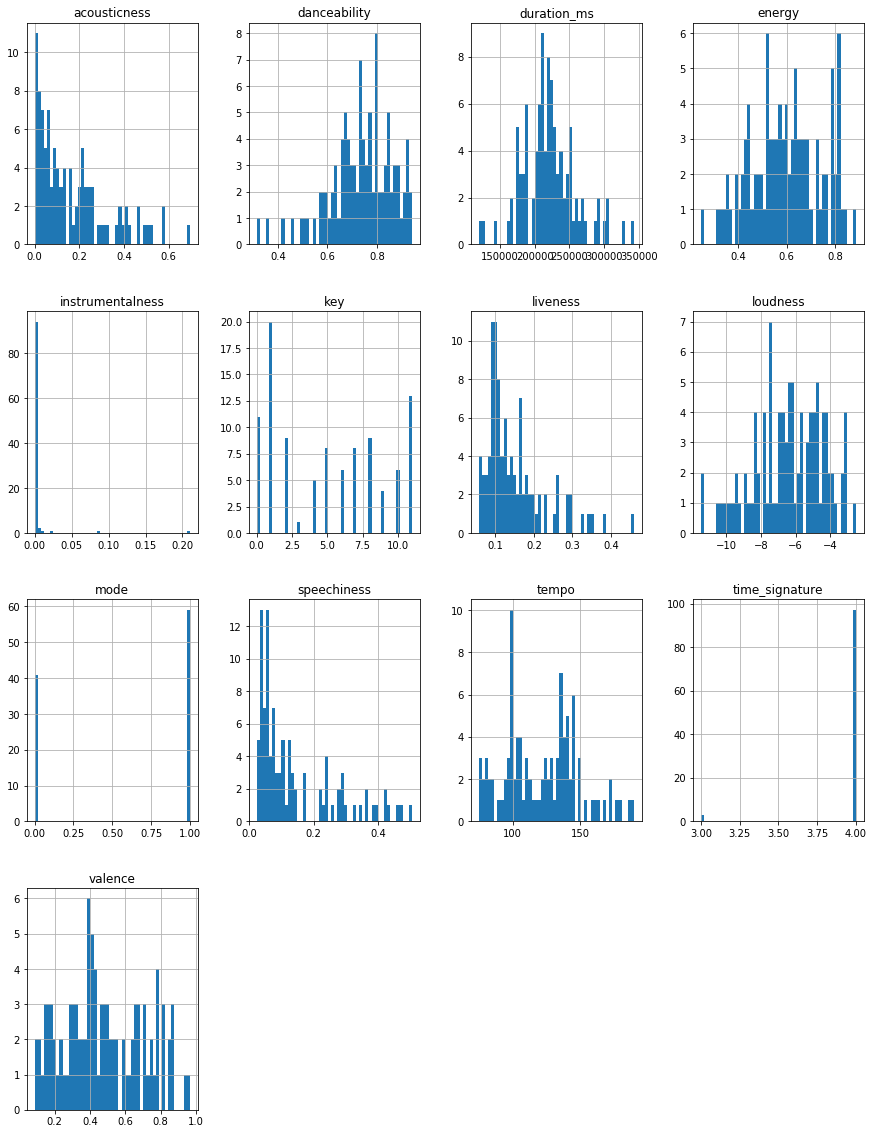

In [7]:
# print histograms of all numerical columns for further data analysis
data.hist(figsize=(15, 20), bins=50)

### 4. Can you compare two related quantities?

Comparing Danceability & Energy, there are a few similarities in their histogram charts. Also, their mean values of this top 100 songs list are rather close to eachother as can be seen below.

In [127]:
print("Mean value for 'Danceability':", data['danceability'].mean())
print("Mean value for 'Energy':", data['energy'].mean())

("Mean value for 'Danceability':", 0.7335499999999999)
("Mean value for 'Energy':", 0.59642)


In [89]:
# new dataset to investigate the top 10 songs on the top 100 list
top_10 = data.head(10)
top_10

,track__artists__name,track__name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Kendrick Lamar,HUMBLE.,0.904,0.611,1,-6.842,0,0.0888,0.000259,0.000020,0.0976,0.400,150.020,177000,4
1,Lil Uzi Vert,XO TOUR Llif3,0.732,0.750,11,-6.366,0,0.2310,0.002640,0.000000,0.1090,0.401,155.096,182707,4
2,Ed Sheeran,Shape of You,0.825,0.652,1,-3.183,0,0.0802,0.581000,0.000000,0.0931,0.931,95.977,233713,4
3,Post Malone,Congratulations (feat. Quavo),0.627,0.812,6,-4.215,1,0.0358,0.198000,0.000000,0.2120,0.504,123.071,220293,4
4,Luis Fonsi,"Despacito - Remix (feat. Daddy Yankee, Justin ...",0.694,0.815,2,-4.328,1,0.1200,0.229000,0.000000,0.0924,0.813,88.931,228827,4
5,Future,Mask Off,0.833,0.434,2,-8.795,1,0.4310,0.010200,0.021900,0.1650,0.281,150.062,204600,4
6,KYLE,iSpy (feat. Lil Yachty),0.746,0.653,7,-6.745,1,0.2890,0.378000,0.000000,0.2290,0.672,75.016,253107,4
7,Khalid,Location,0.736,0.449,1,-11.462,0,0.4250,0.330000,0.000162,0.0898,0.326,80.126,219080,4
8,Bruno Mars,That's What I Like,0.853,0.560,1,-4.961,1,0.0406,0.013000,0.000000,0.0944,0.860,134.066,206693,4
9,French Montana,Unforgettable (feat. Swae Lee),0.726,0.769,6,-5.043,1,0.1230,0.029300,0.010100,0.1040,0.733,97.985,233902,4


In [10]:
# Investigating the top 10 tracks
top_10.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0
mean,0.767600,0.650500,3.800000,-6.194000,0.600000,0.18644,0.177140,0.003218,0.128630,0.592100,115.035000,215992.200000,4.0
std,0.083745,0.139172,3.489667,2.462603,0.516398,0.14998,0.202304,0.007288,0.053288,0.238149,30.980224,23686.876558,0.0
min,0.627000,0.434000,1.000000,-11.462000,0.000000,0.03580,0.000259,0.000000,0.089800,0.281000,75.016000,177000.000000,4.0
25%,0.727500,0.572750,1.000000,-6.817750,0.000000,0.08235,0.010900,0.000000,0.093425,0.400250,90.692500,205123.250000,4.0
50%,0.741000,0.652500,2.000000,-5.704500,1.000000,0.12150,0.113650,0.000000,0.100800,0.588000,110.528000,219686.500000,4.0
75%,0.831000,0.764250,6.000000,-4.486250,1.000000,0.27450,0.304750,0.000127,0.151000,0.793000,146.031500,232491.500000,4.0
max,0.904000,0.815000,11.000000,-3.183000,1.000000,0.43100,0.581000,0.021900,0.229000,0.931000,155.096000,253107.000000,4.0


In [90]:
# new dataset to investigate the top 5 songs on the top 100 list
top_5 = data.head(5)
top_5

,track__artists__name,track__name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Kendrick Lamar,HUMBLE.,0.904,0.611,1,-6.842,0,0.0888,0.000259,0.00002,0.0976,0.400,150.020,177000,4
1,Lil Uzi Vert,XO TOUR Llif3,0.732,0.750,11,-6.366,0,0.2310,0.002640,0.00000,0.1090,0.401,155.096,182707,4
2,Ed Sheeran,Shape of You,0.825,0.652,1,-3.183,0,0.0802,0.581000,0.00000,0.0931,0.931,95.977,233713,4
3,Post Malone,Congratulations (feat. Quavo),0.627,0.812,6,-4.215,1,0.0358,0.198000,0.00000,0.2120,0.504,123.071,220293,4
4,Luis Fonsi,"Despacito - Remix (feat. Daddy Yankee, Justin ...",0.694,0.815,2,-4.328,1,0.1200,0.229000,0.00000,0.0924,0.813,88.931,228827,4


In [12]:
# comparing the top 10 & top 5 musical attributes
top_10.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0
mean,0.767600,0.650500,3.800000,-6.194000,0.600000,0.18644,0.177140,0.003218,0.128630,0.592100,115.035000,215992.200000,4.0
std,0.083745,0.139172,3.489667,2.462603,0.516398,0.14998,0.202304,0.007288,0.053288,0.238149,30.980224,23686.876558,0.0
min,0.627000,0.434000,1.000000,-11.462000,0.000000,0.03580,0.000259,0.000000,0.089800,0.281000,75.016000,177000.000000,4.0
25%,0.727500,0.572750,1.000000,-6.817750,0.000000,0.08235,0.010900,0.000000,0.093425,0.400250,90.692500,205123.250000,4.0
50%,0.741000,0.652500,2.000000,-5.704500,1.000000,0.12150,0.113650,0.000000,0.100800,0.588000,110.528000,219686.500000,4.0
75%,0.831000,0.764250,6.000000,-4.486250,1.000000,0.27450,0.304750,0.000127,0.151000,0.793000,146.031500,232491.500000,4.0
max,0.904000,0.815000,11.000000,-3.183000,1.000000,0.43100,0.581000,0.021900,0.229000,0.931000,155.096000,253107.000000,4.0


In [13]:
# comparing the top 10 & top 5 musical attributes
top_5.describe()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,5.00000,5.00000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.0
mean,0.75640,0.72800,4.20000,-4.986800,0.400000,0.111160,0.202180,0.000004,0.120820,0.60980,122.619000,208508.000000,4.0
std,0.10923,0.09297,4.32435,1.551398,0.547723,0.073446,0.237081,0.000009,0.051402,0.24661,30.209486,26671.546993,0.0
min,0.62700,0.61100,1.00000,-6.842000,0.000000,0.035800,0.000259,0.000000,0.092400,0.40000,88.931000,177000.000000,4.0
25%,0.69400,0.65200,1.00000,-6.366000,0.000000,0.080200,0.002640,0.000000,0.093100,0.40100,95.977000,182707.000000,4.0
50%,0.73200,0.75000,2.00000,-4.328000,0.000000,0.088800,0.198000,0.000000,0.097600,0.50400,123.071000,220293.000000,4.0
75%,0.82500,0.81200,6.00000,-4.215000,1.000000,0.120000,0.229000,0.000000,0.109000,0.81300,150.020000,228827.000000,4.0
max,0.90400,0.81500,11.00000,-3.183000,1.000000,0.231000,0.581000,0.000020,0.212000,0.93100,155.096000,233713.000000,4.0


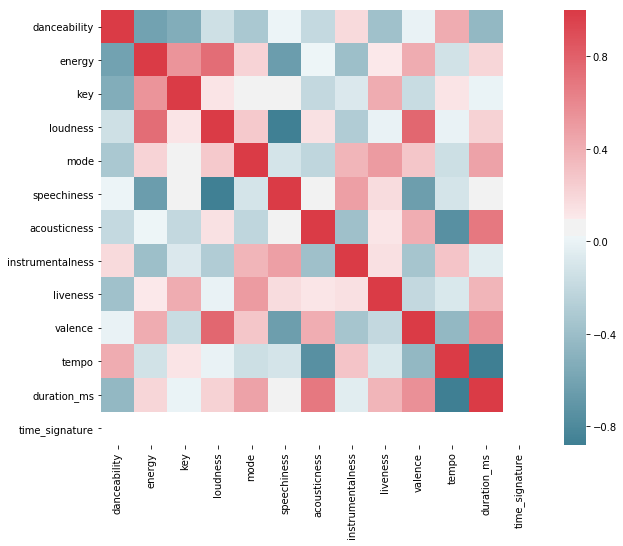

In [39]:
# sns heatmap of the Top 10 songs
f, ax = plt.subplots(figsize=(10, 8))
corr = top_10.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

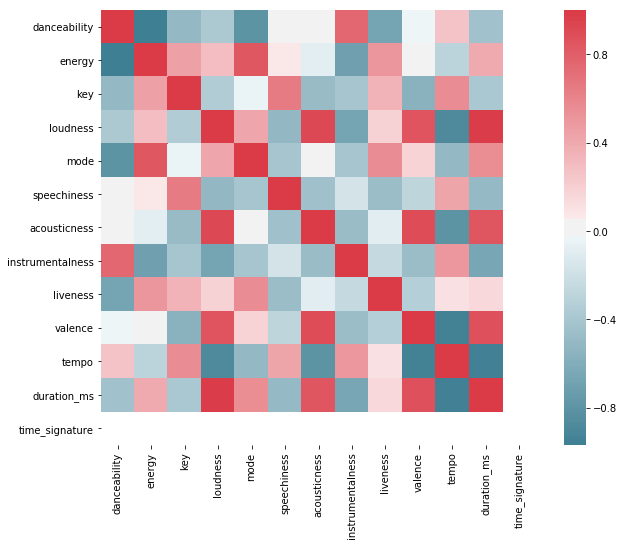

In [40]:
# sns heatmap of the Top 5 songs
f, ax = plt.subplots(figsize=(10, 8))
corr = top_5.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [14]:
# grouping the top 100 & top 10 songs by 'key' to get a count of the most popular 'keys'
print "Key / Pitch Count for the Top 100 Songs"
print data['key'].value_counts()
print "Key / Pitch Count for the Top 10 Songs"
print top_10['key'].value_counts()

Key / Pitch Count for the Top 100 Songs
1     20
11    13
0     11
8      9
2      9
7      8
5      8
10     6
6      6
4      5
9      4
3      1
Name: key, dtype: int64
Key / Pitch Count for the Top 10 Songs
1     4
6     2
2     2
11    1
7     1
Name: key, dtype: int64


Song Key Guide:
0: 'C' - 1: 'C♯,D♭' <br>
2: 'D' - 3: 'D♯,E♭' 
4: 'E' - 5: 'F' 
6: 'F♯,G♭' - 7: 'G'
8: 'G♯,A♭' - 9: 'A'
10: 'A♯,B♭' - 11: 'B'

Findings: The most popular key / pitch value for the Top 100 & Top 10 Songs is 1, which according to Spotify is the key / pitch of 'C♯,D♭'. I'm a bit surprised by these results. Having studied music theory I expected a major key to be the dominant one.

### 5. Can you make a scatterplot?

Yes, the scatterplot below compates the songs Time Signature to the songs duration. It's obvious that the Time Signature of 4.0 is the prominant one in this top 100 songs list.

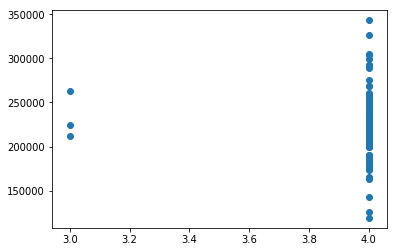

In [15]:
# scatterplot comparing the time signature and song duration of the top 100 songs
x = data['time_signature']
y = data['duration_ms']

plt.scatter(x,y)

plt.show()


### 6. Can you make a time-series plot?

We are not able to male a time series plot of this data as there are no dates to reference in any of this data. SOng duration would be the closest thing to a time-series plot we may be able to get here.

('Mean value for Song Duration:', 221063.55)


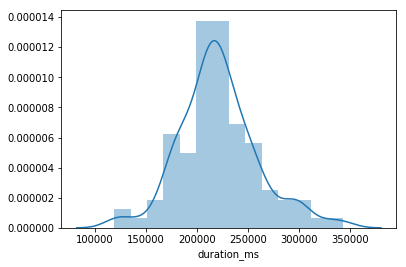

In [16]:
# plot to show the mean value of song duration of the top 100 songs
print("Mean value for Song Duration:", data['duration_ms'].mean())
sns.distplot(data['duration_ms'])
plt.show()

Results: The 2 plots above further prove that a Time Signature of 4 is a clear leader in the top 100 songs and the mean duration of the top 100 songs is 221,063.55 miliseconds, which is 3.6843925 min or just over 3 & a half minutes. 

In [17]:
# dropping columns where the mean value has been determined
data.drop(['time_signature', 'key', 'tempo', 'mode', 'duration_ms'],axis=1,inplace=True)
data.head()

,track__artists__name,track__name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,Kendrick Lamar,HUMBLE.,0.904,0.611,-6.842,0.0888,0.000259,0.00002,0.0976,0.400
1,Lil Uzi Vert,XO TOUR Llif3,0.732,0.750,-6.366,0.2310,0.002640,0.00000,0.1090,0.401
2,Ed Sheeran,Shape of You,0.825,0.652,-3.183,0.0802,0.581000,0.00000,0.0931,0.931
3,Post Malone,Congratulations (feat. Quavo),0.627,0.812,-4.215,0.0358,0.198000,0.00000,0.2120,0.504
4,Luis Fonsi,"Despacito - Remix (feat. Daddy Yankee, Justin ...",0.694,0.815,-4.328,0.1200,0.229000,0.00000,0.0924,0.813


In [23]:
# dropping instrumentalness
data.drop(['instrumentalness'],axis=1,inplace=True)
data.head()

,track__artists__name,track__name,danceability,energy,loudness,speechiness,acousticness,liveness,valence
0,Kendrick Lamar,HUMBLE.,0.904,0.611,-6.842,0.0888,0.000259,0.0976,0.400
1,Lil Uzi Vert,XO TOUR Llif3,0.732,0.750,-6.366,0.2310,0.002640,0.1090,0.401
2,Ed Sheeran,Shape of You,0.825,0.652,-3.183,0.0802,0.581000,0.0931,0.931
3,Post Malone,Congratulations (feat. Quavo),0.627,0.812,-4.215,0.0358,0.198000,0.2120,0.504
4,Luis Fonsi,"Despacito - Remix (feat. Daddy Yankee, Justin ...",0.694,0.815,-4.328,0.1200,0.229000,0.0924,0.813


Findings: After seeing the minimal numeric variance in 'instrumentalness' again, I realized I should have dropped that column sooner. It's mean value was practically 0, which just means all the songs have lyrics. 

In [ ]:
# dropping instrumentalness
data.drop(['instrumentalness'],axis=1,inplace=True)
data.head()

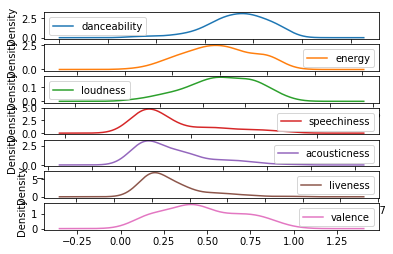

In [35]:
# density plots
data.plot(kind='density', subplots=True, sharex=False)
plt.show()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


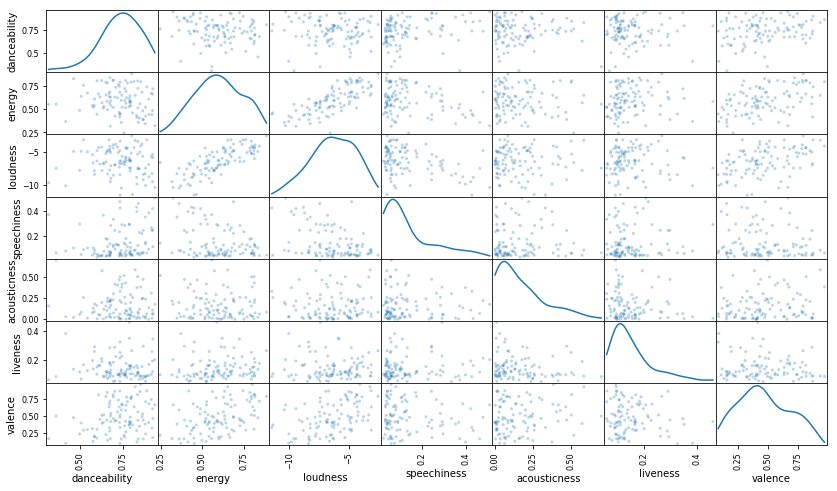

In [24]:
# scatterplot matrix
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

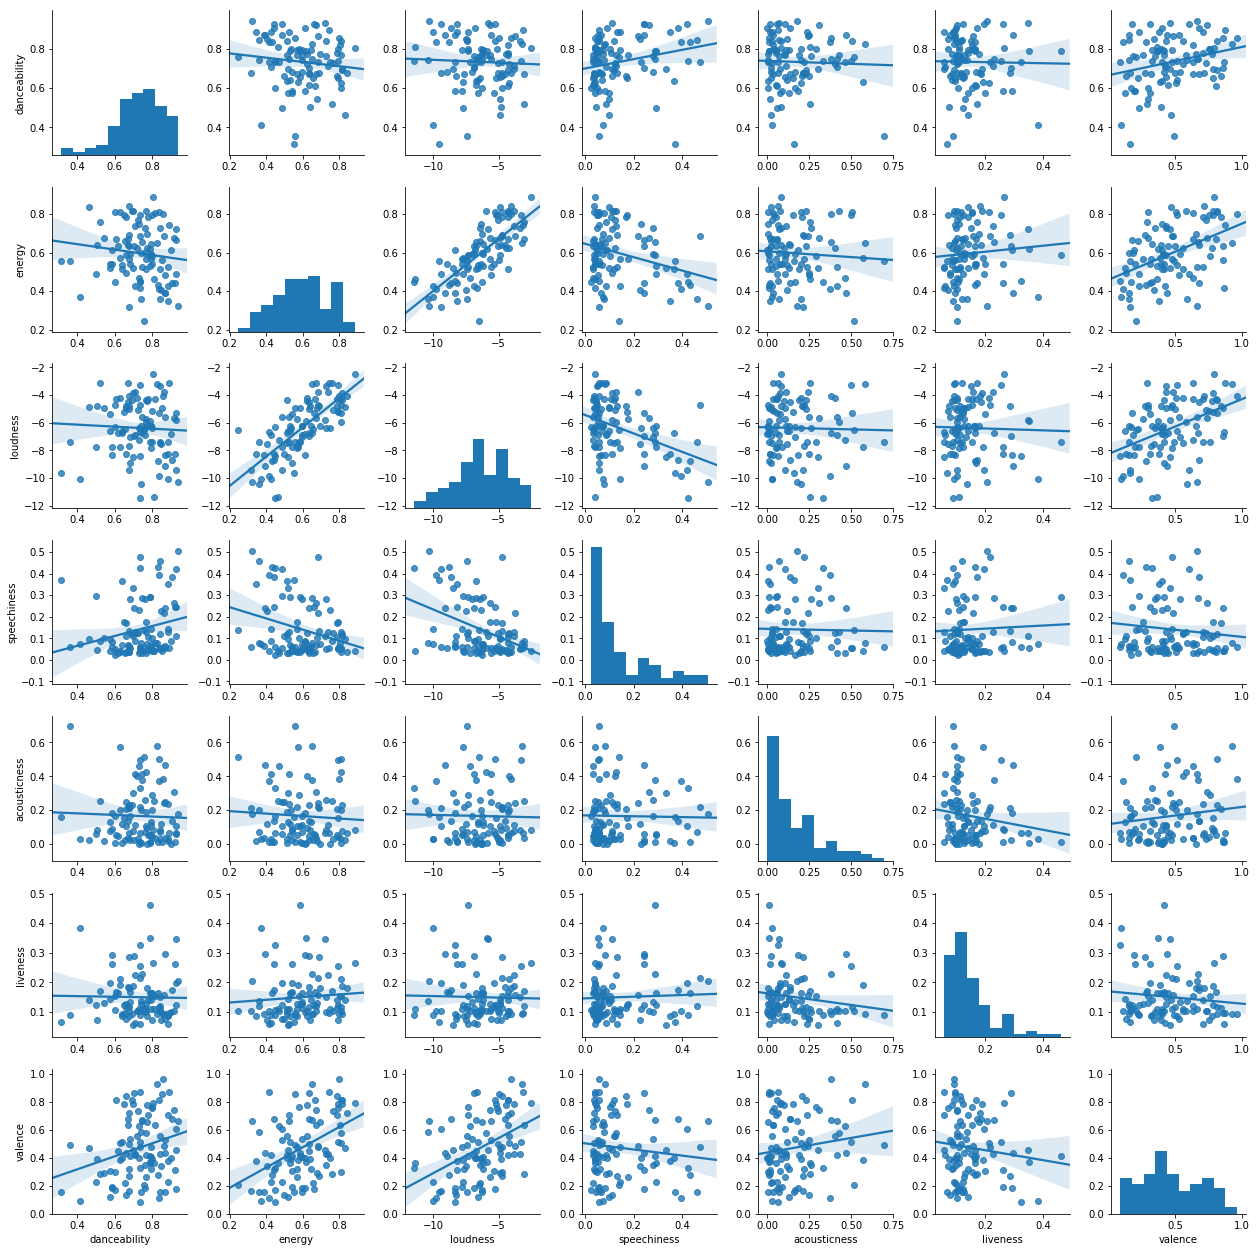

In [25]:
# correlogram plot with linear regression
sns.pairplot(data, kind="reg")
plt.show()

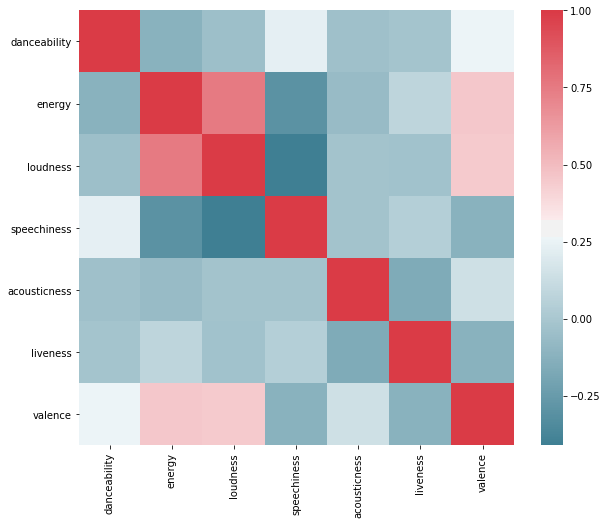

In [27]:
# sns heatmap of the Top 100 Songs
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


In [63]:
# mean value of remaining audio features from the top 100 songs
print("Mean value of remaining audio features:")
print data.mean()

Mean value of remaining audio features:
danceability    0.733550
energy          0.596420
loudness       -6.378080
speechiness     0.141210
acousticness    0.165205
liveness        0.149470
valence         0.473075
dtype: float64


("Mean value for 'Danceability':", 0.7335499999999999)


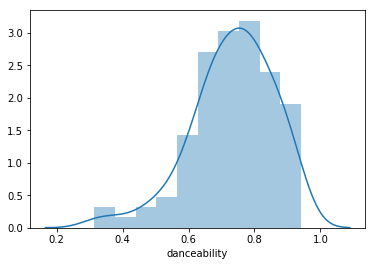

In [84]:
# mean value of dancibility for top 100 songs
print("Mean value for 'Danceability':", data['danceability'].mean())
sns.distplot(data['danceability'])
plt.show()

("Mean value for 'Energy':", 0.59642)


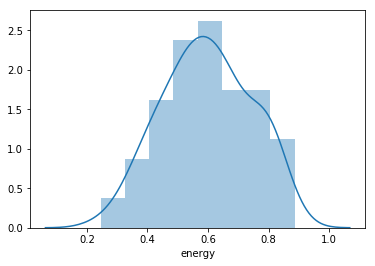

In [83]:
# mean value of energy for top 100 songs
print("Mean value for 'Energy':", data['energy'].mean())
sns.distplot(data['energy'])
plt.show()

("Mean value for 'Loudness':", -6.378080000000003)


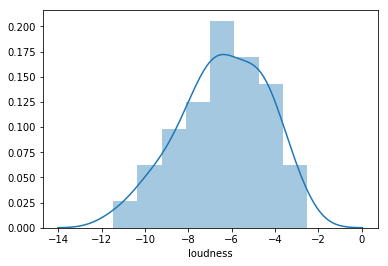

In [82]:
# mean value of loudness for top 100 songs
print("Mean value for 'Loudness':", data['loudness'].mean())
sns.distplot(data['loudness'])
plt.show()

("Mean value for 'Speechiness':", 0.14120999999999997)


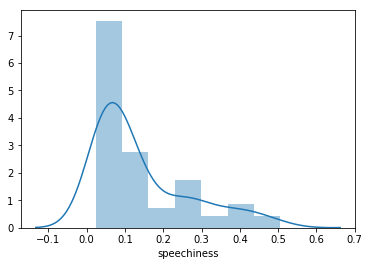

In [81]:
# mean value of speechiness for top 100 songs
print("Mean value for 'Speechiness':", data['speechiness'].mean())
sns.distplot(data['speechiness'])
plt.show()

("Mean value for 'Acousticness:", 0.16520519000000009)


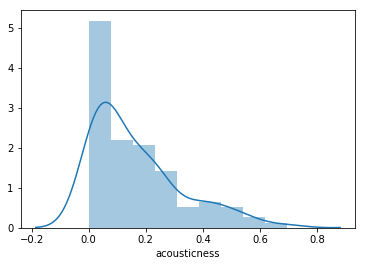

In [80]:
# mean value of acousticness for top 100 songs
print("Mean value for 'Acousticness:", data['acousticness'].mean())
sns.distplot(data['acousticness'])
plt.show()

("Mean value for 'Liveness':", 0.14947000000000005)


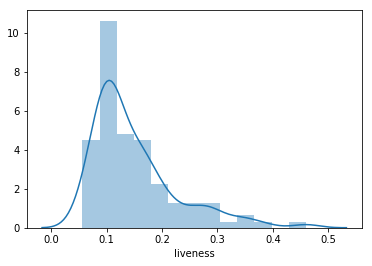

In [76]:
# mean value of liveness for top 100 songs
print("Mean value for 'Liveness':", data['liveness'].mean())
sns.distplot(data['liveness'])
plt.show()

("Mean value for 'Valence':", 0.47307499999999975)


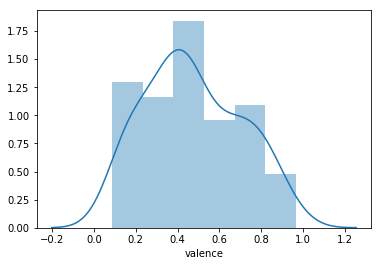

In [79]:
# mean value of valence for top 100 songs
print("Mean value for 'Valence':", data['valence'].mean())
sns.distplot(data['valence'])
plt.show()

### Having made these plots, what are some insights you get from them? 
After the above exploration of the data, a few of the mean values for the top 100, top 10, & top 5 songs show some clear indicators for the following: 
<br><br>
Time Signature of 4.0 <br>
Tempo of about 120 <br>
Mode of 1 (Which means the song is in a Major Modality) <br>
Most Popular key / pitch value of 1 ('C♯,D♭') <br> 
Mean song duration of 221,063.55 miliseconds (which is just over 3 & a half minutes) <br>

Mean value of remaining audio features:
danceability    0.733550 <br>
energy          0.596420 <br>
loudness       -6.378080 <br>
speechiness     0.141210 <br>
acousticness    0.165205 <br>
liveness        0.149470 <br>
valence         0.473075 <br>

### Do you see any correlations? 

According to the heatmap I plotted of the top 100 songs, the closest correlations in this data are Energy & Loudness. I also did a heatmap of the top 10 & top 5 songs on this list and was surprised to see that in the top 5 songs only, Valence & the songs duration in miliseconds has the most significant correlation.

### Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?

Having found some clear indicators and the mean averages of all the audio features, I wonder if there is a way to predict if a song has the potential to be in the top 10 or top 100 songs list.

### By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?

I think the most interesting thing i've disovered from this analysis is the method Spotify uses to put a numeric value on the audio features they use to define each song. I'm most surprised that the song's genre is not a part of their audio features. 

In this analysis, there are a few audio features that immediately became apparent as the clear leaders with all the data leaning towards one direction or in the case of the songs time signature, which was almost unanimous what the most used time signature was. But there are a lot of other audio features that are much more varied in their results per song. Artists and song titles might also be a factor which I had not immediately considered to analyze. I think I may need to do some type of analysis on words used in song titles to see if there are any words that are most common in these songs. 

My initial quest with this analysis was to find some trends and corralations between these audio features to try and build a model to predict if a song could stand out as a possible contender to be included in next years top 100 songs list, but at this current point I'm thinking it may not be possible with the available data provided. 